In [2]:
print("Importing...")
from GCN import *
from datetime import datetime
from utils.my_utils import *
from utils.util import *
import time
from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter
import os
import math
from train_utils import *
import networkx as nx  # graphml visualization
import matplotlib.pyplot as plt

torch.manual_seed(0)
np.random.seed(0)
print("Done importing")

Importing...
Done importing


In [3]:
#check gpu
import torch
print(torch.cuda.is_available())
print(torch.version.cuda)

True
11.3


In [5]:
print("Settings")

run_folder="../"
dataset = "Traceparts_6"
STEP_dataset= dataset + "/STEP_models/"
graphml_dataset = dataset + "/Graphml_Models/"
learning_rate=0.0005
batch_size=1
num_epochs=50
#num_epochs=10
dropout=0.5


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')
print("The calculations will be performed on the device:", device)

# save paths
model_name = dataset + "_" + str(datetime.today().strftime('%m-%d'))
out_dir = os.path.abspath(os.path.join(run_folder, "./results/runs_GAE", dataset))
if not os.path.exists(out_dir + "/Models/"):
    os.makedirs(out_dir + "/Models/")
save_path = out_dir + "/Models/" + model_name
print("Results will be saved in:", out_dir)
print("    The model will be saved as:", save_path)

Settings
The calculations will be performed on the device: cuda:0
Results will be saved in: C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE\Traceparts_6
    The model will be saved as: C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE\Traceparts_6/Models/Traceparts_6_11-16


### CONVERT STEP 3D Models to GRAPHS
To convert STEP models into Graphml data we use the **make_graphh_dataset** Python scripts. It generates an indirect graph from each STEP file.
The function takes two input: 1) the path of the STEP dataset and 2) the output directory where it's gonna write the graph dataset.
To avoid generating each graphs every run, the graph are saved as a **.graphml** format and then reload at subsequent runs.

In [6]:
from Graph_convertion.step_2_graph import make_graphh_dataset

print("Converting STEP dataset in Graphml dataset")
make_graphh_dataset(os.path.abspath(os.path.join(run_folder,"Datasets",STEP_dataset)), os.path.abspath(os.path.join(run_folder,"Datasets",graphml_dataset)))
print("Done converting")

Converting STEP dataset in Graphml dataset


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\sjwoo\\3D_STEP_Classification\\Datasets\\Traceparts_6\\STEP_models/'

### We load the graph dataset
The list of all graph is loaded and divided in train, test and validation set

In [4]:
print(graphml_dataset)
print(os.getcwd())

Traceparts_6/Graphml_Models/
C:\Users\sjwoo\3D_STEP_Classification\Graph_classification


In [7]:
print("Loading Graph data...")
use_degree_as_tag = False
fold = 0
graphs, num_classes = my_load_data(graphml_dataset, use_degree_as_tag)
#print(graphs)
#print(num_classes)
train_graphs, test_graphs = separate_data(graphs, fold)
#print(train_graphs)
#print(test_graphs)
train_graphs, valid_graphs = split_data(train_graphs, perc=0.9)
print("# training graphs: ", len(train_graphs))
print_data_commposition(train_graphs)
print("# validation graphs: ", len(valid_graphs))
print_data_commposition(valid_graphs)
print("# test graphs: ", len(test_graphs))
print_data_commposition(test_graphs)
# Num of different STEP entities founded in the graph dataset
feature_dim_size = graphs[0].node_features.shape[1]
print("Loading data... finished!")

Loading Graph data...
dataset_path: ../Datasets/Traceparts_6/Graphml_Models//
Loading class: 0
Loading class: 1
Loading class: 2
Loading class: 3
Loading class: 4
Loading class: 5
# classes: 6
# maximum node tag: 80
# data: 600
# training graphs:  486
class: 0  - num elements: 81  - elements:  ['0_93.graphml.xml', '0_15.graphml.xml', '0_70.graphml.xml', '0_63.graphml.xml', '0_2.graphml.xml', '0_82.graphml.xml', '0_92.graphml.xml', '0_59.graphml.xml', '0_96.graphml.xml', '0_27.graphml.xml', '0_95.graphml.xml', '0_14.graphml.xml', '0_65.graphml.xml', '0_77.graphml.xml', '0_20.graphml.xml', '0_71.graphml.xml', '0_73.graphml.xml', '0_99.graphml.xml', '0_98.graphml.xml', '0_87.graphml.xml', '0_50.graphml.xml', '0_85.graphml.xml', '0_62.graphml.xml', '0_69.graphml.xml', '0_81.graphml.xml', '0_33.graphml.xml', '0_11.graphml.xml', '0_4.graphml.xml', '0_79.graphml.xml', '0_42.graphml.xml', '0_10.graphml.xml', '0_67.graphml.xml', '0_51.graphml.xml', '0_89.graphml.xml', '0_55.graphml.xml', '0_78.

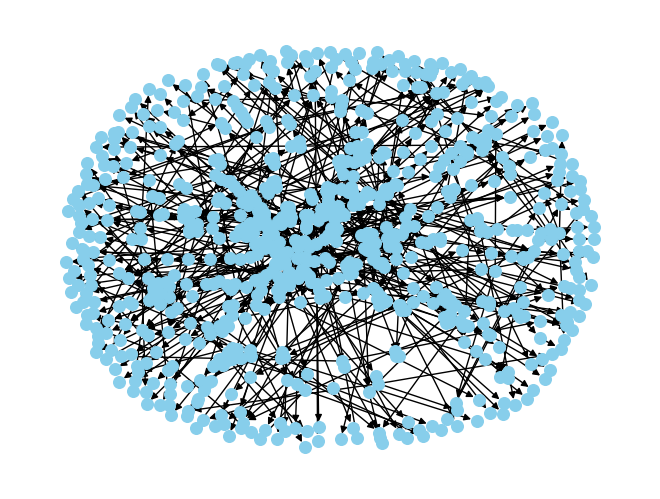

In [8]:
#open graphml
nx.draw(graphs[0].g, with_labels=False, font_size=4, node_size=70, node_color='skyblue')
plt.show()



### Model
We create a Graph Convolutional Neural Network model: the convolutional layers are followed by an attention mechanism and finally by fully connected layers.

bottleneck size pipeline
Results will be saved in: C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn8\Traceparts_6
    The model will be saved as: C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn8\Traceparts_6/Models/Traceparts_6_11-16
Writing to C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn8\Traceparts_6

| epoch   1 | time:  8.42s | train loss 1757.91 | valid loss 1480.93  | 
Save at epoch:   1 at valid loss: 1480.93
| epoch   2 | time:  7.67s | train loss 1183.31 | valid loss 991.07  | 
Save at epoch:   2 at valid loss: 991.07
| epoch   3 | time:  7.13s | train loss 1008.24 | valid loss 844.58  | 
Save at epoch:   3 at valid loss: 844.58
| epoch   4 | time:  7.29s | train loss 906.28 | valid loss 759.67  | 
Save at epoch:   4 at valid loss: 759.67
| epoch   5 | time:  7.56s | train loss 882.45 | valid loss 742.24  | 
Save at epoch:   5 at valid loss: 742.24
| epoch   6 | time:  7.17s | train loss 860.95 | valid loss 725.66  | 
Save at epoch:   6 at valid

graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn8\Traceparts_6/generated_graphml/gen_2_17.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn8\Traceparts_6/generated_graphml/gen_2_22.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn8\Traceparts_6/generated_graphml/gen_2_25.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn8\Traceparts_6/generated_graphml/gen_2_33.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn8\Traceparts_6/generated_graphml/gen_2_48.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn8\Traceparts_6/generated_graphml/gen_2_68.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn8\Traceparts_6/generated_graphml/gen_2_92.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn8\Traceparts_6/generated_graphml/gen_3_101.graphml

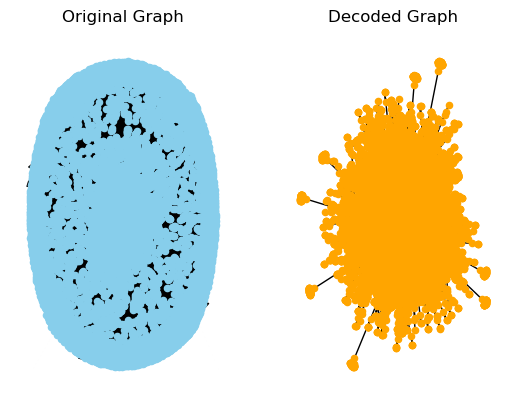

Evaluate: loss on test:  509.7818976084391
Results will be saved in: C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn16\Traceparts_6
    The model will be saved as: C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn16\Traceparts_6/Models/Traceparts_6_11-16
Writing to C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn16\Traceparts_6

| epoch   1 | time:  7.47s | train loss 1941.48 | valid loss 1649.16  | 
Save at epoch:   1 at valid loss: 1649.16
| epoch   2 | time:  7.24s | train loss 1587.59 | valid loss 1329.60  | 
Save at epoch:   2 at valid loss: 1329.60
| epoch   3 | time:  7.50s | train loss 1418.19 | valid loss 1194.43  | 
Save at epoch:   3 at valid loss: 1194.43
| epoch   4 | time:  7.35s | train loss 1327.15 | valid loss 1126.48  | 
Save at epoch:   4 at valid loss: 1126.48
| epoch   5 | time:  7.51s | train loss 1283.40 | valid loss 1094.22  | 
Save at epoch:   5 at valid loss: 1094.22
| epoch   6 | time:  7.39s | train loss 1270.62 | valid loss 1083.6

graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn16\Traceparts_6/generated_graphml/gen_2_16.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn16\Traceparts_6/generated_graphml/gen_2_17.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn16\Traceparts_6/generated_graphml/gen_2_22.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn16\Traceparts_6/generated_graphml/gen_2_25.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn16\Traceparts_6/generated_graphml/gen_2_33.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn16\Traceparts_6/generated_graphml/gen_2_48.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn16\Traceparts_6/generated_graphml/gen_2_68.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn16\Traceparts_6/generated_graphml/gen_2_92.

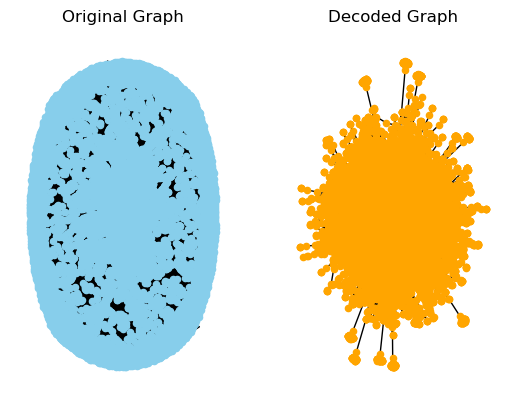

Evaluate: loss on test:  881.1473365783692
Results will be saved in: C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn24\Traceparts_6
    The model will be saved as: C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn24\Traceparts_6/Models/Traceparts_6_11-16
Writing to C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn24\Traceparts_6

| epoch   1 | time:  7.49s | train loss 1411.59 | valid loss 1183.77  | 
Save at epoch:   1 at valid loss: 1183.77
| epoch   2 | time:  7.23s | train loss 943.37 | valid loss 777.36  | 
Save at epoch:   2 at valid loss: 777.36
| epoch   3 | time:  7.71s | train loss 825.42 | valid loss 681.71  | 
Save at epoch:   3 at valid loss: 681.71
| epoch   4 | time:  7.30s | train loss 762.45 | valid loss 631.36  | 
Save at epoch:   4 at valid loss: 631.36
| epoch   5 | time:  7.32s | train loss 752.70 | valid loss 618.97  | 
Save at epoch:   5 at valid loss: 618.97
| epoch   6 | time:  7.68s | train loss 702.45 | valid loss 583.24  | 
Save at 

graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn24\Traceparts_6/generated_graphml/gen_2_25.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn24\Traceparts_6/generated_graphml/gen_2_33.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn24\Traceparts_6/generated_graphml/gen_2_48.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn24\Traceparts_6/generated_graphml/gen_2_68.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn24\Traceparts_6/generated_graphml/gen_2_92.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn24\Traceparts_6/generated_graphml/gen_3_101.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn24\Traceparts_6/generated_graphml/gen_3_28.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn24\Traceparts_6/generated_graphml/gen_3_31

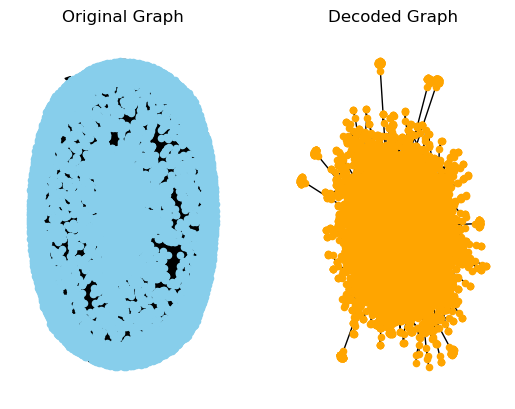

Evaluate: loss on test:  565.5850140889486
Results will be saved in: C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn32\Traceparts_6
    The model will be saved as: C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn32\Traceparts_6/Models/Traceparts_6_11-16
Writing to C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn32\Traceparts_6

| epoch   1 | time:  7.51s | train loss 1449.68 | valid loss 1210.85  | 
Save at epoch:   1 at valid loss: 1210.85
| epoch   2 | time:  7.29s | train loss 961.44 | valid loss 785.53  | 
Save at epoch:   2 at valid loss: 785.53
| epoch   3 | time:  7.71s | train loss 801.68 | valid loss 652.40  | 
Save at epoch:   3 at valid loss: 652.40
| epoch   4 | time:  7.26s | train loss 706.20 | valid loss 579.71  | 
Save at epoch:   4 at valid loss: 579.71
| epoch   5 | time:  7.24s | train loss 651.12 | valid loss 540.55  | 
Save at epoch:   5 at valid loss: 540.55
| epoch   6 | time:  7.65s | train loss 627.86 | valid loss 523.14  | 
Save at 

graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn32\Traceparts_6/generated_graphml/gen_2_16.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn32\Traceparts_6/generated_graphml/gen_2_17.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn32\Traceparts_6/generated_graphml/gen_2_22.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn32\Traceparts_6/generated_graphml/gen_2_25.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn32\Traceparts_6/generated_graphml/gen_2_33.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn32\Traceparts_6/generated_graphml/gen_2_48.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn32\Traceparts_6/generated_graphml/gen_2_68.graphml
graphml created:  C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE_bn32\Traceparts_6/generated_graphml/gen_2_92.

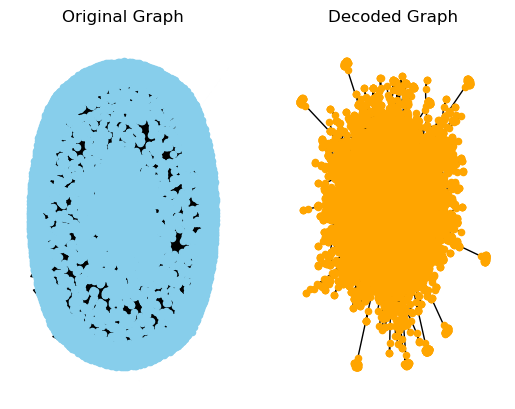

Evaluate: loss on test:  436.0388771692912
Finished training


In [9]:
import time
print("bottleneck size pipeline")
#bn_sizes = [24]
bn_sizes = [8, 16, 24, 32]
model_dict = {}
test_losses = []
times = []

for bn_size in bn_sizes:
    model_name = dataset + "_" + str(datetime.today().strftime('%m-%d'))
    out_dir = os.path.abspath(os.path.join(run_folder, "./results/runs_GAE" + "_bn" + str(bn_size), dataset))
    if not os.path.exists(out_dir + "/Models/"):
        os.makedirs(out_dir + "/Models/")
    save_path = out_dir + "/Models/" + model_name
    print("Results will be saved in:", out_dir)
    print("    The model will be saved as:", save_path)
    
    # Create the function name dynamically
    function_name = f'GCN_CN_v4_AE_bn{bn_size}'
    
    model = globals()[function_name](feature_dim_size=feature_dim_size, num_classes=num_classes, dropout=dropout).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    num_batches_per_epoch = int((len(train_graphs) - 1) / batch_size) + 1
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=num_batches_per_epoch, gamma=0.1)
    
    print("Writing to {}\n".format(out_dir))
    # Checkpoint directory
    checkpoint_dir = os.path.abspath(os.path.join(out_dir, "checkpoints"))
    checkpoint_prefix = os.path.join(checkpoint_dir, "model")
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
    write_acc = open(checkpoint_prefix + '_acc.txt', 'w')

    best_loss = math.inf
    train_begin_time = time.time()
    
    train_losses = []
    valid_losses = []

    # Train loop
    for epoch in range(1, num_epochs + 1):
        epoch_start_time = time.time()
        # train model
        train_AE(mmodel=model, optimizer=optimizer, train_graphs=train_graphs, batch_size=batch_size, num_classes=num_classes, device=device)
        # evaluate on train data
        train_loss = evaluate_AE(mmodel=model, current_graphs=train_graphs, batch_size=batch_size, num_classes=num_classes, device=device, out_dir=out_dir)
        # evaluate on validation data
        valid_loss = evaluate_AE(mmodel=model, current_graphs=valid_graphs, batch_size=batch_size, num_classes=num_classes, device=device, out_dir=out_dir)
        print('| epoch {:3d} | time: {:5.2f}s | train loss {:5.2f} | valid loss {:5.2f}  | '.format(epoch, (time.time() - epoch_start_time), train_loss, valid_loss))

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        # Make a step of the optimizer if the mean of the last 6 epochs were better than the current epoch
        if epoch > 5 and train_losses[-1] > np.mean(train_losses[-6:-1]):
            scheduler.step()
            print("Scheduler step")
        # save if best performance ever
        if best_loss > valid_loss:
            print("Save at epoch: {:3d} at valid loss: {:5.2f}".format(epoch, valid_loss))
            best_loss = valid_loss
            torch.save(model.state_dict(), save_path)
            model_dict[bn_size] = model
        write_acc.write('epoch ' + str(epoch) + ' fold ' + str(fold) + ' mse ' + str(valid_loss*100) + '%\n')
        
    times.append(time.time()-train_begin_time)
        
    # Testing
    test_loss = evaluate_AE(mmodel=model, current_graphs=test_graphs, batch_size=batch_size, num_classes=num_classes, device=device, out_dir=out_dir, last_round=True)
    test_losses.append(test_loss)
    print("Evaluate: loss on test: ", test_loss)

print("Finished training")
    

In [12]:
print(bn_sizes)
print(test_losses)
print(times)

[8, 16, 24, 32]
[509.7818976084391, 881.1473365783692, 565.5850140889486, 436.0388771692912]
[368.9062490463257, 369.91886615753174, 372.95185947418213, 371.61983346939087]


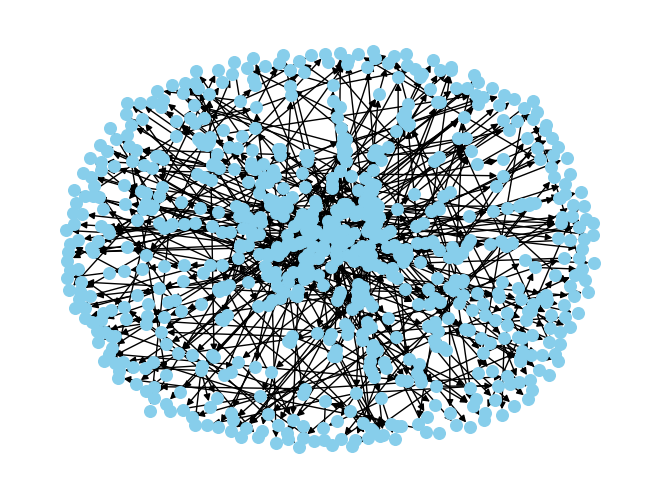

In [13]:
#open graphml
nx.draw(graphs[0].g, with_labels=False, font_size=4, node_size=70, node_color='skyblue')
plt.show()

In [ ]:
print("Creating model")

# Create a GCN model
model = GCN_CN_v4_AE(feature_dim_size=feature_dim_size, num_classes=num_classes, dropout=dropout).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
num_batches_per_epoch = int((len(train_graphs) - 1) / batch_size) + 1
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=num_batches_per_epoch, gamma=0.1)

In [6]:

print("Main process")

print("Writing to {}\n".format(out_dir))
# Checkpoint directory
checkpoint_dir = os.path.abspath(os.path.join(out_dir, "checkpoints"))
checkpoint_prefix = os.path.join(checkpoint_dir, "model")
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
write_acc = open(checkpoint_prefix + '_acc.txt', 'w')

train_losses = []
valid_losses = []

best_loss = math.inf
# Train loop
for epoch in range(1, num_epochs + 1):
    epoch_start_time = time.time()
    # train model
    train_AE(mmodel=model, optimizer=optimizer, train_graphs=train_graphs, batch_size=batch_size, num_classes=num_classes, device=device)
    # evaluate on train data
    train_loss = evaluate_AE(mmodel=model, current_graphs=train_graphs, batch_size=batch_size, num_classes=num_classes, device=device, out_dir=out_dir)
    # evaluate on validation data
    valid_loss = evaluate_AE(mmodel=model, current_graphs=valid_graphs, batch_size=batch_size, num_classes=num_classes, device=device, out_dir=out_dir)
    print('| epoch {:3d} | time: {:5.2f}s | train loss {:5.2f} | valid loss {:5.2f}  | '.format(epoch, (time.time() - epoch_start_time), train_loss, valid_loss))

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    # Make a step of the optimizer if the mean of the last 6 epochs were better than the current epoch
    if epoch > 5 and train_losses[-1] > np.mean(train_losses[-6:-1]):
        scheduler.step()
        print("Scheduler step")
    # save if best performance ever
    if best_loss > valid_loss:
        print("Save at epoch: {:3d} at valid loss: {:5.2f}".format(epoch, valid_loss))
        best_loss = valid_loss
        torch.save(model.state_dict(), save_path)
    write_acc.write('epoch ' + str(epoch) + ' fold ' + str(fold) + ' mse ' + str(valid_loss*100) + '%\n')

print("Finished training")

Main process
Writing to C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE\Traceparts_6

Total MSE loss:  693470.6527481079
Total num graphs:  486
Total MSE loss:  70603.43408203125
Total num graphs:  54
| epoch   1 | time:  8.64s | train loss 1426.89 | valid loss 1307.47  | 
Save at epoch:   1 at valid loss: 1307.47
Total MSE loss:  455370.3394470215
Total num graphs:  486
Total MSE loss:  45808.02869415283
Total num graphs:  54
| epoch   2 | time:  7.23s | train loss 936.98 | valid loss 848.30  | 
Save at epoch:   2 at valid loss: 848.30
Total MSE loss:  432777.00135040283
Total num graphs:  486
Total MSE loss:  43263.751903533936
Total num graphs:  54
| epoch   3 | time:  7.89s | train loss 890.49 | valid loss 801.18  | 
Save at epoch:   3 at valid loss: 801.18
Total MSE loss:  400365.2422866821
Total num graphs:  486
Total MSE loss:  40334.62219619751
Total num graphs:  54
| epoch   4 | time:  7.35s | train loss 823.80 | valid loss 746.94  | 
Save at epoch:   4 at valid loss: 7

In [7]:
print("Plot results 10 epochs")


test_loss = evaluate_AE(mmodel=model, current_graphs=test_graphs, batch_size=batch_size, num_classes=num_classes, device=device, out_dir=out_dir, last_round=True)
print("Evaluate: loss on test: ", test_loss)

write_acc.close()

Plot results 10 epochs
Total MSE loss:  39686.21728515625
Total num graphs:  60


NetworkXError: Input array must be 2D, not 1

In [18]:
print(out_dir)

C:\Users\sjwoo\3D_STEP_Classification\results\runs_GAE\Traceparts_6


In [19]:
print(graphs[0].name_graph)

0_10.graphml.xml
